In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

import numpy as np

In [2]:
#df = pd.read_csv("compas-scores-two-years-violent.csv", index_col=0)
df = pd.read_csv("compas-scores-two-years.csv", index_col=0)


In [3]:
y = y = df['two_year_recid']
keep_cols = [
    'age',             # defendant age
    'sex',             # male/female
    'race',            # categorical
    'priors_count',    # number of prior offenses
    'c_charge_degree'  # felony vs misdemeanor
]

X_safe = df[keep_cols].copy()

# One‐hot encode the categoricals
X= pd.get_dummies(X_safe, drop_first=True)

In [4]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

In [5]:

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109) # 70% training and 30% test

#Create a svm Classifier
clf = svm.SVC(kernel='rbf',class_weight='balanced',probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [6]:

# Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Accuracy: 0.67
Precision: 0.64
Recall: 0.67


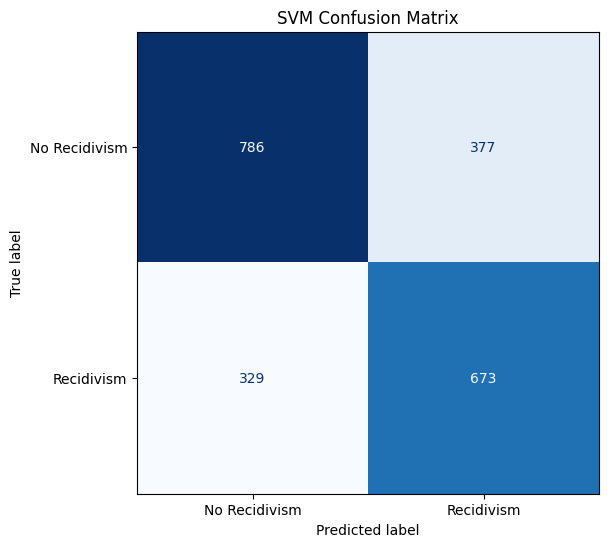

In [7]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['No Recidivism', 'Recidivism']
)

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap='Blues', colorbar=False)
plt.title("SVM Confusion Matrix")
plt.show()

In [8]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import roc_curve, auc

In [ ]:
'''kfold = KFold(n_splits = 20, shuffle=True)
scores = cross_val_score(estimator=clf, X=X, y=y, scoring="accuracy", cv=kfold)
cross_val_accuracy = cross_val_score(estimator=clf, X=X, y=y, scoring="accuracy", cv=kfold)
cross_val_accuracy_mean = np.mean(cross_val_accuracy)
cross_val_accuracy_std = np.std(cross_val_accuracy)

print(f"K-fold validation score {scores}")
print(f"Average k-fold validation score : {scores.mean()}")
print(f"Average error on fold: {cross_val_accuracy_mean}")
print(f"Standard error on fold: {cross_val_accuracy_std}")'''

KeyboardInterrupt: 

In [ ]:
'''kfold = KFold(n_splits = 20, shuffle=True)
scores = cross_val_score(estimator=clf, X=X, y=y, scoring="precision", cv=kfold)
cross_val_precision = cross_val_score(estimator=clf, X=X, y=y, scoring="precision", cv=kfold)
cross_val_precision_mean = np.mean(cross_val_precision)
cross_val_precision_std = np.std(cross_val_precision)

print(f"K-fold validation score {scores}")
print(f"Average k-fold validation score : {scores.mean()}")
print(f"Average error on fold: {cross_val_precision_mean}")
print(f"Standard error on fold: {cross_val_precision_std}")'''

In [ ]:
'''kfold = KFold(n_splits = 20, shuffle=True)
scores = cross_val_score(estimator=clf, X=X, y=y, scoring="recall", cv=kfold)
cross_val_recall = cross_val_score(estimator=clf, X=X, y=y, scoring="recall", cv=kfold)
cross_val_recall_mean = np.mean(cross_val_recall)
cross_val_recall_std = np.std(cross_val_recall)

print(f"K-fold validation score {scores}")
print(f"Average k-fold validation score : {scores.mean()}")
print(f"Average error on fold: {cross_val_recall_mean}")
print(f"Standard error on fold: {cross_val_recall_std}")'''

In [ ]:
kfold = KFold(n_splits=20, shuffle=True)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for train_index, test_index in kfold.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    clf.fit(X_train_fold, y_train_fold)
    
    proba_matrix_fold = clf.predict_proba(X_test_fold)
    fpr, tpr, thresholds = roc_curve(y_test_fold, proba_matrix_fold[:, 1])
    
    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    
mean_tpr /= kfold.get_n_splits()

roc_auc = auc(mean_fpr, mean_tpr)

plt.figure()
plt.plot(mean_fpr, mean_tpr, color='darkorange', lw=2, label='Mean ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean Receiver Operating Characteristic (ROC) Curve with k-fold')
plt.legend(loc="lower right")
plt.show()